In [89]:
from Bib.Monatsbilanzierung import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

### Fensterfläche zufallsbasiert

In [71]:
# ergebnisse_heizwärmebedarf = []
ergebnisse = np.array([])
anzahl_versuche = 4000
for i in range(anzahl_versuche):
    geschossanzahl = 4
    geschosshöhe = 2.9
    gebäudelänge = 30
    gebäudebreite = 30
    wandfläche_nord_süd = gebäudelänge * geschosshöhe * geschossanzahl
    wandfläche_ost_west = gebäudebreite * geschosshöhe * geschossanzahl

    dach = Dach(name="Dach1", fläche=(gebäudebreite*gebäudelänge))
    wand1 = Außenwand("Wand1", (wandfläche_nord_süd),0) # Nordfenster
    wand2 = Außenwand("Wand2", (wandfläche_ost_west),90) # Ostfenster
    wand3 = Außenwand("Wand3", (wandfläche_nord_süd),180) # Südfenster
    wand4 = Außenwand("Wand4", (wandfläche_ost_west),270) # Westfenster
    fensterflächenanteil_nord = np.random.default_rng().uniform(0.1,0.65)
    fensterflächenanteil_ost = np.random.default_rng().uniform(0.1,0.65)
    fensterflächenanteil_süd = np.random.default_rng().uniform(0.1,0.65)
    fensterflächenanteil_west = np.random.default_rng().uniform(0.1,0.65)
    fst1 = Fenster("Fenster1", (wandfläche_nord_süd*fensterflächenanteil_nord), 0)
    fst2 = Fenster("Fenster2", (wandfläche_ost_west*fensterflächenanteil_ost), 90)
    fst3 = Fenster("Fenster3", (wandfläche_nord_süd*fensterflächenanteil_süd), 180)
    fst4 = Fenster("Fenster4", (wandfläche_ost_west*fensterflächenanteil_west), 270)
    bpl = Bodenplatte("Bpl1", (gebäudebreite*gebäudelänge))
    
    Testprojekt = Monatsbilanz(wand1,wand2,wand3,wand4, dach, bpl, fst1,fst2,fst3,fst4,
                                        name="Testprojekt", geschossanzahl=geschossanzahl, 
                                        geschosshöhe=geschosshöhe, wärmebrückenzuschlag=0.05,
                                        luftwechsel=0.6, einfamilienhaus=False, schweresGebäude=True)
    
    Luftdichte, Innentemperatur, CwirkLuft, volumen, Cwirk, luftvolumen, nutzfläche, Hv = Testprojekt.konstanten_berechnen(bpl.fläche)
    bauteilliste, hüllfläche, a_v_verhältnis = Testprojekt.bauteilliste_erstellen()
    fensterliste = Testprojekt.fensterliste_erstellen()
    monatsbilanzierung = Testprojekt.monatsbilanzierung_erstellen()
    
    ergebnisse = np.append(ergebnisse, [monatsbilanzierung.loc["Heizwärmebedarf"].sum(),
                                        fst1.fläche, fst2.fläche, fst3.fläche, fst4.fläche, 
                                        fensterflächenanteil_nord, fensterflächenanteil_ost, fensterflächenanteil_süd, fensterflächenanteil_west
                                       ])

In [72]:
ergebnisse = ergebnisse.reshape(anzahl_versuche,9).round(1)
np.set_printoptions(suppress=True, precision=3)

In [73]:
# Ich möchte das ganze Array von der Variante, in der der Heizwärmebedarf am niedrigsten war
minimum = np.where (ergebnisse[:, 0] == ergebnisse[0:,0].min())
maximum = np.where (ergebnisse[:, 0] == ergebnisse[0:,0].max())
print (ergebnisse[minimum][0])
print (ergebnisse[maximum][0])

[47652.     47.9   211.7   222.     68.2     0.1     0.6     0.6     0.2]
[76825.     93.1    35.2    36.5    46.2     0.3     0.1     0.1     0.1]


In [74]:
# Was is die höchste Fensterfläche im Süden und ist das die gleiche Variante mit dem geringsten Heizwärmebedarf?
maximum_fensterfläche_süd = np.where (ergebnisse[:, 3] == ergebnisse[0:,3].max())
print (ergebnisse[maximum_fensterfläche_süd][0]==ergebnisse[maximum][0]) # Nein, aber nah dran
print (ergebnisse[maximum_fensterfläche_süd][0])

[False False False False False  True False False False]
[49257.     97.2   146.8   226.2   196.8     0.3     0.4     0.6     0.6]


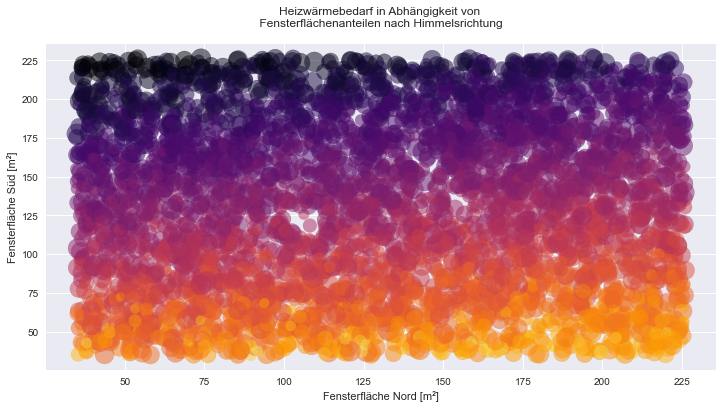

In [75]:
plt.figure (figsize=(12,6))
plt.scatter(ergebnisse[0:,1], ergebnisse[0:,3], s=(ergebnisse[0:,2]+ergebnisse[0:,4]), c=ergebnisse[0:,0],
            cmap="inferno", vmin=ergebnisse[minimum][0,0], vmax=ergebnisse[maximum][0,0], alpha=0.5)
plt.xlabel("Fensterfläche Nord [m²]")
plt.ylabel("Fensterfläche Süd [m²]")
plt.title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteilen nach Himmelsrichtung \n")
plt.show()

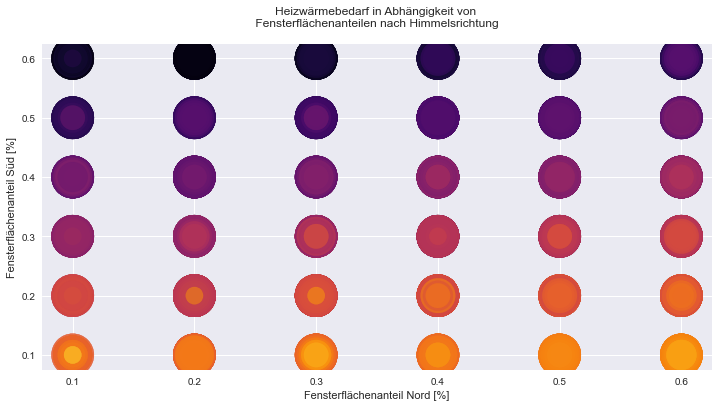

In [76]:
plt.figure (figsize=(12,6))
plt.scatter(ergebnisse[:,5], ergebnisse[:,7], s=ergebnisse[:,6]*3000, c=ergebnisse[:,0],
            cmap="inferno", alpha=0.5)
plt.xlabel("Fensterflächenanteil Nord [%]")
plt.ylabel("Fensterflächenanteil Süd [%]")
plt.title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteilen nach Himmelsrichtung \n")
plt.show()

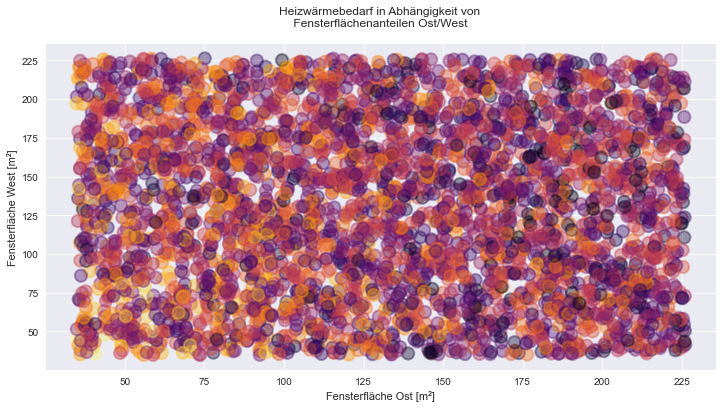

In [77]:
# Da nun die Fenster Ost- und West gleich groß sind, ist diese Abbildung unspektakulär
plt.figure (figsize=(12,6))
plt.scatter(ergebnisse[:,2], ergebnisse[:,4], c=ergebnisse[:,0],
            cmap="inferno", alpha=0.4, lw=2, s=150) # Dunkler ist niedrigerer Bedarf
plt.xlabel("Fensterfläche Ost [m²]")
plt.ylabel("Fensterfläche West [m²]")
plt.title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteilen Ost/West \n")
plt.show()

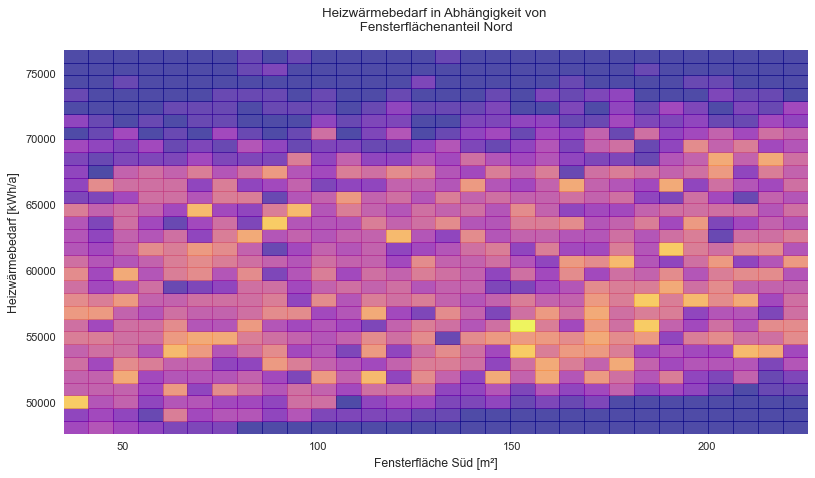

In [101]:
plt.figure (figsize=(12,6), facecolor="white", edgecolor="black")
plt.hist2d(ergebnisse[0:,1], ergebnisse[0:,0],cmap="plasma", bins=30, alpha=0.7)
plt.xlabel("Fensterfläche Süd [m²]")
plt.ylabel("Heizwärmebedarf [kWh/a]")
plt.title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteil Nord \n")
plt.show()

[]

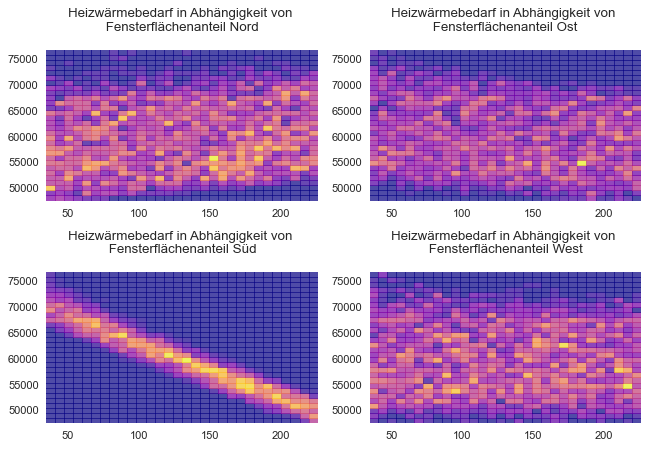

In [121]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
ax1[0].hist2d(ergebnisse[0:,1], ergebnisse[0:,0],cmap="plasma", bins=30, alpha=0.7)
ax1[0].set_title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteil Nord \n")
ax1[1].hist2d(ergebnisse[0:,2], ergebnisse[0:,0],cmap="plasma", bins=30, alpha=0.7)
ax1[1].set_title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteil Ost \n")
ax2[0].hist2d(ergebnisse[0:,3], ergebnisse[0:,0],cmap="plasma", bins=30, alpha=0.7)
ax2[0].set_title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteil Süd \n")
ax2[1].hist2d(ergebnisse[0:,4], ergebnisse[0:,0],cmap="plasma", bins=30, alpha=0.7)
ax2[1].set_title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteil West \n")
plt.plot()
